#Nomor 1

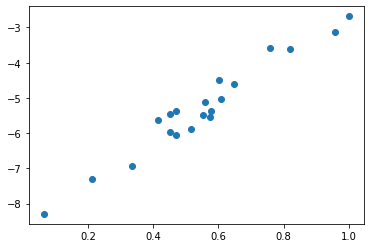

In [ ]:
#import package dan module
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import joblib
%matplotlib inline

a, b = 6, -9
X = np.random.rand(20)
y = a*X + b + np.random.rand(20)

#Membuat plot
plt.scatter(X, y)
plt.show()

In [ ]:
#Coefficients dan intercept Linear Regression menggunakan formula
n = 20                                                                          #banyak data
intercept = ((y.sum())*((X**2).sum())-(X.sum())*((X*y).sum()))/(n*((X**2).sum())-(X.sum())**2)
coef = (n*((X*y).sum())-(X.sum())*(y.sum()))/(n*((X**2).sum())-(X.sum())**2)

In [ ]:
regr = LinearRegression()
regr.fit(X.reshape(-1, 1),y)

LinearRegression()

In [ ]:
#Perbedaan coefficients dan intercept Linear Regression menggunakan formula dengan package sklearn
print('Coefficient Linear Regression with formula: ',coef)
print('Intercept Linear Regression with formula: ',intercept)
print('Coefficient Linear Regression with sklearn: ',regr.coef_[0])
print('Intercept Linear Regression with sklearn: ',regr.intercept_)
print('Different between coefficient Linear Regression with sklearn and formula: ',abs(coef-regr.coef_[0]))
print('Different between intercept Linear Regression with sklearn and formula: ',abs(intercept-regr.intercept_))

Coefficient Linear Regression with formula:  5.984949472544728
Intercept Linear Regression with formula:  -8.578069391229267
Coefficient Linear Regression with sklearn:  5.984949472544761
Intercept Linear Regression with sklearn:  -8.578069391229285
Different between coefficient Linear Regression with sklearn and formula:  3.2862601528904634e-14
Different between intercept Linear Regression with sklearn and formula:  1.7763568394002505e-14


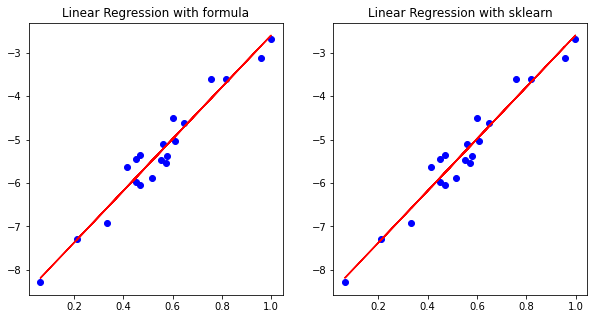

In [ ]:
#Visualisasi Linear Regression dengan formula dan sklearn
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(X, coef*X + intercept, '-r')
ax[0].scatter(X,y, color='b')
ax[1].plot(X, regr.coef_[0]*X + regr.intercept_, '-r')
ax[1].scatter(X,y, color='b')
ax[0].set_title('Linear Regression with formula')
ax[1].set_title('Linear Regression with sklearn')
plt.show()


In [ ]:
#RMSE (Root Mean Squared Error) dengan module sklearn.metrics
print('RMSE (Root Mean Squared Error) with formula: ',mean_squared_error(y, coef*X + intercept)**(1/2))
print('RMSE (Root Mean Squared Error) with sklearn: ',mean_squared_error(y, regr.coef_[0]*X + regr.intercept_)**(1/2))

RMSE (Root Mean Squared Error) with formula:  0.2953822286057952
RMSE (Root Mean Squared Error) with sklearn:  0.29538222860579544


In [ ]:
joblib.dump(regr, 'Nomor_1.pkl')

['Nomor_1.pkl']

##Penjelasan
Program ini adalah program yang dibuat untuk menampilkan model Linear Regression dengan 2 metode, yaitu formula dan package sklearn.\
Algoritma: \
1. Mengimport package dan module yang dibutuhkan, seperti numpy, matplotlib untuk visualisasi, sklearn untuk model Linear Regression dan RMSE, dan joblib untuk menyimpan model sebagai file dengan format pickle.
2. Inisiasi variable a dan b, X sebagai array yang berisi angka random sebanyak 20, dan y sebagai fungsi linear.
3. Visualisasi X dan y sebagai scatter menggunakan package matplotlib.pyplot
4. Inisiasi variable coef dan intercept sebagai coefficients dan intercept Linear Regression dengan menggunakan formula matematika.
5. Inisiasi variable regr untuk menggunakan module LinearRegression(), menggunakan module .fit() untung fitting linear model.
6. Menampilkan Coefficient dan Intercept menggunakan formula dan module dari package sklearn serta selisih dari 2 metode tersebut.
7. Visualisasi Linear Regression dengan formula dan sklearn menggunakan package matplotlib dan menjadikannya subplot supaya dapat berdampingan.
8. Menampilkan RMSE (Root Mean Squared Error) dari kedua metode tersebut.
9. Menggunakan module dari package joblib untuk menyimpan model sebagai file dengan format pickle.


#Nomor 2

In [ ]:
#import package dan module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Import dan menampilkan dataset yang digunakan
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#slicing dataset yang akan digunakan untuk model
X = np.asanyarray(df[['PetalLengthCm', 'PetalWidthCm']])
Y = df['Species']

In [ ]:
#Mengubah data text/string menjadi float, mengubah menjadi array 1d
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Y_array = ordinal_encoder.fit_transform(np.array([Y]).reshape(-1,1))
Y_array = Y_array.ravel()

In [ ]:
Y_array                         # 'Iris-setosa' == 0 , 'Iris-versicolor' == 1, 'Iris-virginica' == 2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
#pisah data menjadi data latih dan data uji dengan perbandingan 7:3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size=0.3, random_state = 4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (105, 2) (105,)
Test set:  (45, 2) (45,)


In [ ]:
#Inisiasi variable untuk menggunakan module LogisticRegression dan fitting model LogisticRegressionc
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
#Memprediksi data test dan melihat akurasi skornya
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9777777777777777

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      0.90      0.95        10
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



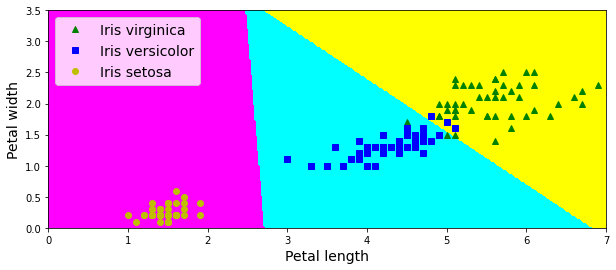

In [ ]:
#Visualisasi data tes dengan plotting decision boundary dan scatter
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = classifier.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
a = plt.plot(X[Y_array==2][:,0], X[Y_array==2][:,1], "g^", label="Iris virginica")
b = plt.plot(X[Y_array==1][:,0], X[Y_array==1][:,1], "bs", label="Iris versicolor")
c = plt.plot(X[Y_array==0][:,0], X[Y_array==0][:,1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
custom_cmap = ListedColormap(['#FF00FF','#00FFFF','#FFFF00'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
#Contoh soal prediksi
question = [[[4,2]], [[2.4,3]], [[5.6,3.3]]]
for i in question:
  answer = classifier.predict(i)
  if answer == 0:
    print('Petal Length {0} cm, Width {1} cm, Species: Iris setosa'.format(i[0][0], i[0][1]))
  elif answer == 1:
    print('Petal Length {0} cm, Width {1} cm, Species: Iris versicolor'.format(i[0][0], i[0][1]))
  else:
    print('Petal Length {0} cm, Width {1} cm, Species: Iris virginica'.format(i[0][0], i[0][1]))

Petal Length 4 cm, Width 2 cm, Species: Iris versicolor
Petal Length 2.4 cm, Width 3 cm, Species: Iris setosa
Petal Length 5.6 cm, Width 3.3 cm, Species: Iris virginica


In [ ]:
joblib.dump(classifier, 'Nomor_2.pkl')

['Nomor_2.pkl']

##Penjelasan 
Program ini adalah program yang dibuat untuk membuat model LogisticRegression untuk mengklasifikasi data ukuran panjang (length) dan lebar (width) dari petal ketiga species yang ada di Iris dataset. \
Algoritmanya: \
1. Import package dan module yang dibutuhkan.
2. import dataset menggunakan pandas dan menampilkannya sebagai data frame.
3. Melihat info dari dataset, seperti banyak baris dan kolom, nama kolom, jenis data, jumlah data null.
4. Slicing dataset yang akan digunakan untuk model, terlebih dahulu ubah dataframe pada X menjadi array menggunakan module dari numpy dan data pada Y yang berisi object atau text/string diubah menjadi array 1d menggunakan module dari sklearn.
5. Pisah data menjadi data latih dan data uji dengan perbandingan 7:3 menggunakan module dari sklearn.
6. Inisiasi variable untuk menggunakan module LogisticRegression dan fitting model LogisticRegression.
7. Memprediksi data test dan melihat akurasi skor dari prediksi tersebut menggunakan module dari sklearn.
8. Visualisasi data tes dengan plotting decision boundary dan scatter menggunakan matplotlib.
9. Menggunakan module dari package joblib untuk menyimpan model sebagai file dengan format pickle. 

#Nomor 3

In [ ]:
#import package dan module yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
#membuka file data text
with open('about dataset.txt', 'r') as w:
  print(w.read())

About datasets
1. age - age in years 
2. sex - sex (1 = male; 0 = female) 
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy) 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect 
14. output - the predicted attribute - diagnosis of heart disease (0 = less chance of heart attack, 1 = higher chance of heart attack)



In [ ]:
#import dan menampilkan dataset sebagai data frame
heart_df = pd.read_csv('heart.csv')
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#info dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Menampilkan banyaknya jumlah data pada setiap nilai yang terdapat di kolom output 
heart_df['output'].value_counts()                                               # 0 = less chance of heart attack, 1 = higher chance of heart attack

1    165
0    138
Name: output, dtype: int64

In [ ]:
#besarnya korelasi antar variable kolom
heart_corr = heart_df.corr()
heart_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


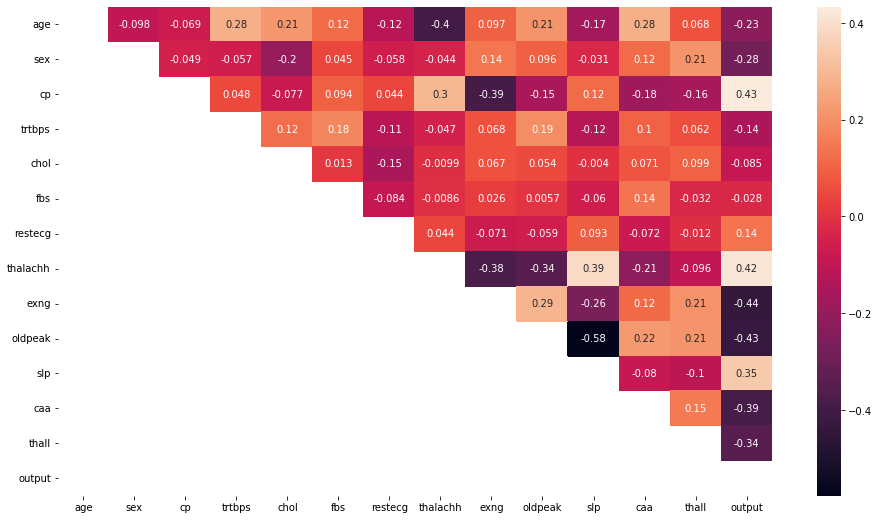

In [ ]:
# triangle heatmapUpper 
 
plt.figure(figsize=(16,9))
  
matrix = np.tril(heart_corr) # take lower correlation matrix
 
sns.heatmap(heart_corr, mask=matrix, annot = True)

In [ ]:
#Melihat rata rata nilai data yang berkorelasi dengan variable output
important_corr_value = abs(heart_corr.output[:13]).mean()
important_corr_value

0.2851110313190721

In [ ]:
#Banyaknya variable yang nilai korelasinya dengan output memenuhi minimal nilai penting untuk menentukan feature-feature yang berpengaruh
important_corr = heart_corr.output[abs(heart_corr['output']) > important_corr_value][:7]
important_corr

cp          0.433798
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
Name: output, dtype: float64

In [ ]:
#Mengambil/slicing data yg memiliki korelasi besar dan juga target variabel dalam bentuk array
X = heart_df[np.insert(important_corr.index.values,0,'age')].values
Y = heart_df['output'].values

In [ ]:
#Scaling dataset
scaling = StandardScaler()
X = scaling.fit_transform(X)

In [ ]:
#pisah data menjadi data latih dan data uji dengan perbandingan 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (242, 8) (242,)
Test set:  (61, 8) (61,)


In [ ]:
#define module function untuk pemodelan
log_reg = LogisticRegression()
svm_class = SVC()
decision_tree = DecisionTreeClassifier()

In [ ]:
#Lakukan cross validation untuk melihat metode mana yang terbaik untuk digunakan pada kasus ini sebelum ke test set
print(cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(svm_class, X_train, Y_train, cv=5, scoring='f1').sum()/5)
print(cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring='f1').sum()/5)

0.8538614555563708
0.8465328940800638
0.8126374636801647


In [ ]:
#Karena Logistic Regression memiliki kinerja model lebih bagus setelah dievaluasi, maka akan digunakan metode Logistic Regression untuk pemodelan
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Inisiasi variable prediksi menggunakan Logistic Regression yang memprediksi X_test
Y_pred = log_reg.predict(X_test)

In [ ]:
#Skor akurasi model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8524590163934426

In [ ]:
#f1 skor model
f1_score(Y_test, Y_pred)

0.8656716417910447

In [ ]:
#Menyimpan model dalam bentuk file format pickle
import joblib

joblib.dump(log_reg, 'Nomor_3.pkl')

['Nomor_3.pkl']

In [ ]:
joblib.load('Nomor_3.pkl')

LogisticRegression()

##Penjelasan
Program ini adalah program yang dibuat untuk menententukan model terbaik (error
kecil, tetapi tidak overfitting) untuk memprediksi kemungkinan resiko sakit jantung pada pasien. \
Algoritmanya: \
1. import package dan module yang dibutuhkan, utamanya numpy, pandas, sklearn, seaborn nanti untuk plotting.
2. Menampilkan dataset heart dengan pandas sebagai dataframe yang sebelumnya sudah kita upload terlebih dahulu file csv nya.
3. Menampilkan info dataset untuk mengetahui banyaknya baris dan kolom, nama-nama kolom, banyak data non-null untuk setiap kolom, dan jenis tiap data perkolom.
4. Menampilkan banyaknya jumlah data pada setiap nilai yang terdapat di kolom output karena kolom output nantinya akan jadi variable target pemodelan.
5. Menampilkan besarnya nilai korelasi antar variable kolom.
6. Membuat dan menampilkan plotting triangle heatmapUpper dari data korelasi menggunakan seaborn
7. Melihat rata rata nilai data yang berkorelasi dengan variable output.
8. Melihat banyaknya variable yang nilai korelasinya dengan output memenuhi minimal nilai penting untuk menentukan feature-feature yang berpengaruh.
9. Mengambil/slicing data yg memiliki korelasi besar dan juga target variabel dalam bentuk array.
10. Melakukakn Scaling pada dataset X yang sudah diambil sebelumnya pada step ke-9.
11. pisah data menjadi data latih dan data uji dengan perbandingan 8:2
12. Define module function untuk pemodelan, di sini digunakan Logistic Regression, SVM, dan Decision Tree.
13. Lakukan cross validation untuk melihat metode mana yang terbaik untuk digunakan pada kasus ini.
14. Karena Logistic Regression memiliki kinerja model lebih bagus setelah dievaluasi, maka akan digunakan metode Logistic Regression untuk pemodelan. 
15. Inisiasi variable prediksi menggunakan Logistic Regression yang memprediksi X_test.
16. Melihat akurasi skor dan f1 skor model yang sudah dibuat.
17. Simpan Model kedalam file pickle.


#Nomor 4

In [ ]:
#import package dan module yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
#Menampilkan dataset
CC_df = pd.read_csv('CreditCard.csv')
CC_df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,5149055,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,5149729,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,5149838,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [ ]:
#info dataset
CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [ ]:
#Menampilkan banyaknya jumlah data pada setiap nilai yang terdapat di kolom Target 
CC_df['Target'].value_counts()                                                  # 1 = berisiko tinggi gagal bayar, 0= berisiko rendah gagal bayar

0    8426
1    1283
Name: Target, dtype: int64

In [ ]:
#Memilih dan melihat fitur fitur yang kemungkinan berpengaruh terhadap variable Target dengan cara menghapus/drop data yang tidak dipakai
CC_df.drop(['ID', 'Gender', 'Num_children', 'Work_phone', 'Phone', 'Email', 'Account_length', 'Income_type', 'Family_status', 'Occupation_type'], axis=1, inplace=True)

In [ ]:
#Menampilkan dataset setelah didrop beberapa fitur yang tidak terpakai
CC_df

,Own_car,Own_property,Unemployed,Num_family,Total_income,Age,Years_employed,Education_type,Housing_type,Target
0,1,1,0,2,427500.0,32.868574,12.435574,Higher education,Rented apartment,1
1,1,1,0,2,112500.0,58.793815,3.104787,Secondary / secondary special,House / apartment,0
2,0,1,0,1,270000.0,52.321403,8.353354,Secondary / secondary special,House / apartment,0
3,0,1,1,1,283500.0,61.504343,0.000000,Higher education,House / apartment,0
4,1,1,0,2,270000.0,46.193967,2.105450,Higher education,House / apartment,0
...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,2,180000.0,56.400884,0.542106,Secondary / secondary special,Municipal apartment,1
9705,0,1,0,2,112500.0,43.360233,7.375921,Secondary / secondary special,House / apartment,1
9706,1,1,0,2,90000.0,52.296762,4.711938,Secondary / secondary special,House / apartment,1
9707,0,1,0,2,157500.0,33.914454,3.627727,Higher education,House / apartment,1


In [ ]:
#Memilih/slicing dataset yang akan digunakan untuk model
X = CC_df.drop('Target', axis=1)
Y = CC_df[['Target']]

In [ ]:
#pisah data menjadi data latih dan data uji dengan perbandingan 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)
print('Train set: ', X_train.shape, Y_train.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (7767, 9) (7767, 1)
Test set:  (1942, 9) (1942, 1)


In [ ]:
#Transforming 
pipeline = ColumnTransformer([
    ('cat', OrdinalEncoder(), ['Education_type', 'Housing_type']),
    ('num', StandardScaler(), ['Own_car', 'Own_property', 'Unemployed', 'Num_family', 'Total_income', 'Age', 'Years_employed'])
])

In [ ]:
#fitting dataset
X_train_prepared = pipeline.fit_transform(X_train)

In [ ]:
# define oversampling strategy
SMOTE = SMOTE()

In [ ]:
# fit and apply the transform
X_train_SMOTE, Y_train_SMOTE = SMOTE.fit_resample(X_train_prepared, Y_train)

In [ ]:
#Setelah distribusi kelas akibat oversampling
print('Train set: ', X_train_SMOTE.shape, Y_train_SMOTE.shape)
print('Test set: ', X_test.shape, Y_test.shape)

Train set:  (13476, 9) (13476, 1)
Test set:  (1942, 9) (1942, 1)


In [ ]:
#Melihat bentuk dataset X_train_SMOTE
X_train_SMOTE

array([[ 1.        ,  5.        , -0.75732511, ..., -0.68542818,
        -1.50343395, -0.60708276],
       [ 4.        ,  1.        , -0.75732511, ..., -1.00098648,
         0.12018299,  0.41678157],
       [ 1.        ,  1.        , -0.75732511, ..., -0.4600294 ,
         0.24077431, -0.26969757],
       ...,
       [ 1.26319408,  5.        , -0.75732511, ..., -0.76134383,
        -1.1965941 ,  0.27900439],
       [ 4.        ,  1.        , -0.75732511, ...,  0.55139738,
         0.26565016, -0.8915618 ],
       [ 0.25743201,  1.        ,  1.32043687, ...,  0.89236331,
        -0.91052243, -0.40237359]])

In [ ]:
#Mengubah dataset Y_train_SMOTE dari dataframe menjadi array dan mengubah menjadi array 1d
Y_train_SMOTE = np.asanyarray(Y_train_SMOTE)
Y_train_SMOTE = Y_train_SMOTE.ravel()

In [ ]:
#bentuk Y_train_SMOTE setelah diubah
Y_train_SMOTE

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#define module function untuk pemodelan
log_reg = LogisticRegression()
svm_class = SVC()
decision_tree = DecisionTreeClassifier()

In [ ]:
#Lakukan cross validation untuk melihat metode mana yang terbaik untuk digunakan pada kasus ini sebelum ke test set
print(cross_val_score(log_reg, X_train_SMOTE, Y_train_SMOTE, cv=5, scoring='f1').sum()/5)
print(cross_val_score(svm_class, X_train_SMOTE, Y_train_SMOTE, cv=5, scoring='f1').sum()/5)
print(cross_val_score(decision_tree, X_train_SMOTE, Y_train_SMOTE, cv=5, scoring='f1').sum()/5)

0.5484603118151476
0.6219181544847746
0.7917817953332132


In [ ]:
#Karena decision tree memiliki kinerja model lebih bagus setelah dievaluasi, maka akan digunakan metode decision tree untuk pemodelan
decision_tree.fit(X_train_SMOTE, Y_train_SMOTE)

DecisionTreeClassifier()

In [ ]:
#Mengubah dataset Y_test dari dataframe menjadi array dan mengubah menjadi array 1d
Y_test = np.asanyarray(Y_test)
Y_test = Y_test.ravel()

In [ ]:
Y_test

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#Transform data pada X_test
X_test_prepared = pipeline.transform(X_test)

In [ ]:
X_test_prepared

array([[ 1.        ,  1.        , -0.75732511, ..., -0.23463062,
         1.21848433,  2.36650373],
       [ 4.        ,  1.        , -0.75732511, ..., -0.91082697,
        -0.34471896, -0.57282385],
       [ 4.        ,  2.        ,  1.32043687, ..., -0.64034843,
         0.37009728,  0.89206971],
       ...,
       [ 1.        ,  1.        ,  1.32043687, ..., -0.91082697,
         1.6262765 , -0.8915618 ],
       [ 4.        ,  1.        , -0.75732511, ..., -0.00923183,
         0.15180576,  2.73771418],
       [ 1.        ,  1.        , -0.75732511, ...,  1.11776209,
         0.65163435, -0.46484324]])

In [ ]:
#Inisiasi variable prediksi menggunakan decision tree yang memprediksi X_test_prepared
Y_pred = decision_tree.predict(X_test_prepared)

In [ ]:
#Skor akurasi model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7353244078269825

In [ ]:
#f1 skor model, ternyata setelah di oversampling tidak ada peningkatan lebih untuk f1 skornya
f1_score(Y_test,Y_pred)

0.196875

In [ ]:
#Menyimpan model dalam benntuk file format pickle
import joblib

joblib.dump(decision_tree, 'Nomor_4.pkl')

['Nomor_4.pkl']

##Penjelasan
Program ini adalah program yang dibuat untuk menententukan model terbaik (error
kecil, tetapi tidak overfitting) untuk memprediksi kemungkinan resiko gagal bayar pada aplikan kartu kredit. \
Algoritmanya: \
1. import package dan module yang dibutuhkan, utamanya numpy, pandas, sklearn, di sini ada tambahan imblearn untuk masalah imbalance data pada soal ini.
2. Menampilkan dataset credit card dengan pandas sebagai dataframe yang sebelumnya sudah kita upload terlebih dahulu file csv nya.
3. Menampilkan info dataset untuk mengetahui banyaknya baris dan kolom, nama-nama kolom, banyak data non-null untuk setiap kolom, dan jenis tiap data perkolom.
4. Menampilkan banyaknya jumlah data pada setiap nilai yang terdapat di kolom Target karena kolom Target nantinya akan jadi variable target pemodelan.
5. Memilih dan melihat fitur fitur yang kemungkinan berpengaruh terhadap variable Target dengan cara menghapus/drop data yang tidak dipakai.
6. Memilih/slicing dataset yang akan digunakan untuk model setelah dilakukan step ke-5.
7. pisah data menjadi data latih dan data uji dengan perbandingan 8:2
8. Transforming data-data untuk setiap kolom yang jenisnya kategorik dan numerik.
9. Fitting dataset pada X_train setelah di transform, sehingga di dapatkan dalam bentuk array dan fit.
10. Definisikan fungsi SMOTE dari package imblearn untuk melakukan metode oversampling.
11. Fitting lagi dataset pada X_train menggunakan SMOTE dengan meresample(oversampling) data yang sebelumnya telah diambil menjadi X_train_SMOTE.
12. Karena X_train_SMOTE sudah dalam bentuk array,sekarang ubah dataset Y_train_SMOTE dari dataframe menjadi array dan mengubah menjadi array .
13. Define module function untuk pemodelan, di sini digunakan Logistic Regression, SVM, dan Decision Tree.
14. Lakukan cross validation untuk melihat metode mana yang terbaik untuk digunakan pada kasus ini.
15. Karena decision tree memiliki kinerja model lebih bagus setelah dievaluasi, maka akan digunakan metode decision tree untuk pemodelan.
16. Mengubah dataset Y_test dari dataframe menjadi array dan mengubah menjadi array 1d serta Transform data pada X_test.
17. Inisiasi variable prediksi menggunakan decision tree yang memprediksi X_test_prepared(X_test_prepared adalah X_test yang sudah di transform).
18. Melihat akurasi skor dan f1 skor model yang sudah dibuat, untuk f1 skor terlihat sangat kecil dan tidak ada peningkatan meskipun sudah dilakukan oversampling.
19. Simpan Model kedalam file pickle.


#Nomor 5

In [168]:
#Import package dan module yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
#Menampilkan dataset
CarPrice_df = pd.read_csv('CarPrice.csv')
CarPrice_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
#info dataset
CarPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

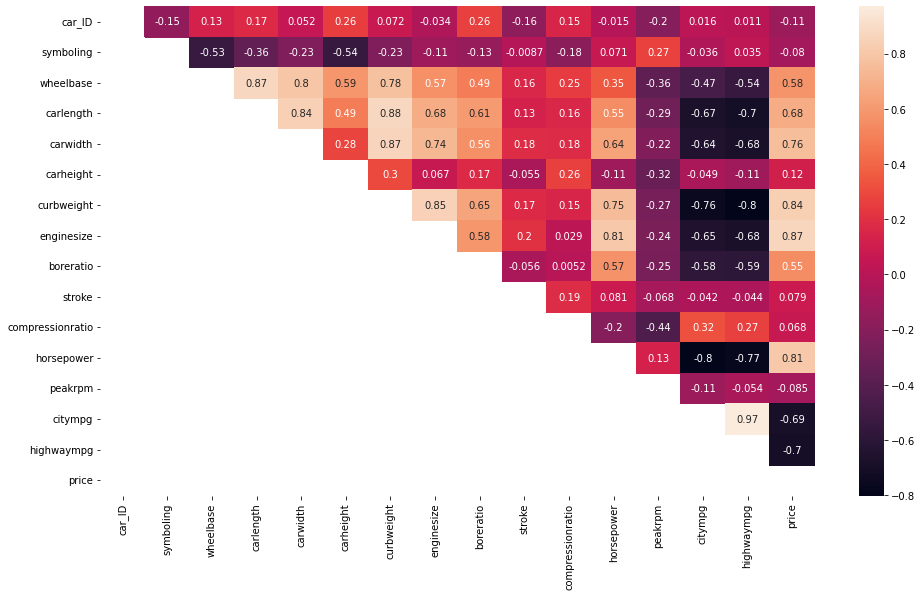

In [ ]:
# triangle heatmapUpper 
 
plt.figure(figsize=(16,9))
  
matrix = np.tril(CarPrice_df.corr()) # take lower correlation matrix
 
sns.heatmap(CarPrice_df.corr(), mask=matrix, annot = True)

In [ ]:
CarPrice_df.drop('car_ID', axis=1).corr().price[abs(CarPrice_df.drop('car_ID', axis=1).corr().price)>abs(CarPrice_df.drop('car_ID', axis=1).corr().price[:14]).mean()]

wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
boreratio     0.553173
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64

In [ ]:
#Melihat data data yang memilki korelasi tinggi
high_corr_val = CarPrice_df.drop('car_ID', axis=1).corr().price[abs(CarPrice_df.drop('car_ID', axis=1).corr().price)>abs(CarPrice_df.drop('car_ID', axis=1).corr().price[:14]).sum()/14].index.values
high_corr_val

array(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype=object)

Plot beberapa data yang diperlukan

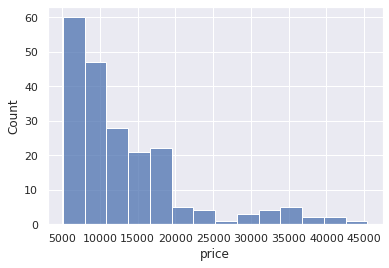

In [101]:
sns.histplot(CarPrice_df['price'])

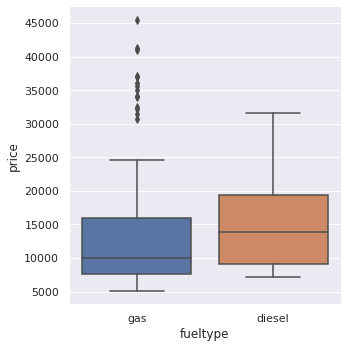

In [103]:
sns.catplot(data=CarPrice_df, x='fueltype', y='price', kind='box')

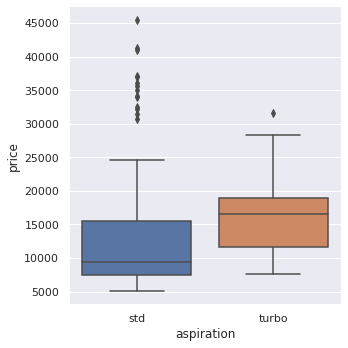

In [104]:
sns.catplot(data=CarPrice_df, x='aspiration', y='price', kind='box')

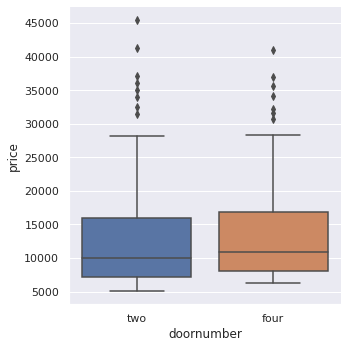

In [105]:
sns.catplot(data=CarPrice_df, x='doornumber', y='price', kind='box')

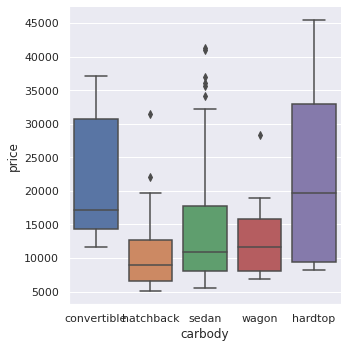

In [106]:
sns.catplot(data=CarPrice_df, x='carbody', y='price', kind='box')

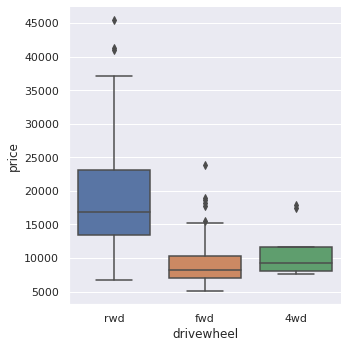

In [108]:
sns.catplot(data=CarPrice_df, x='drivewheel', y='price', kind='box')

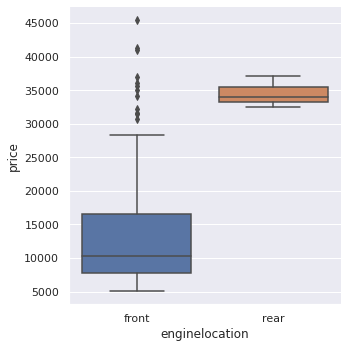

In [109]:
sns.catplot(data=CarPrice_df, x='enginelocation', y='price', kind='box')

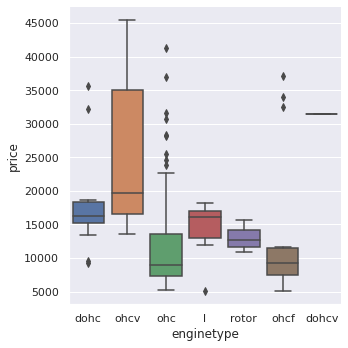

In [110]:
sns.catplot(data=CarPrice_df, x='enginetype', y='price', kind='box')

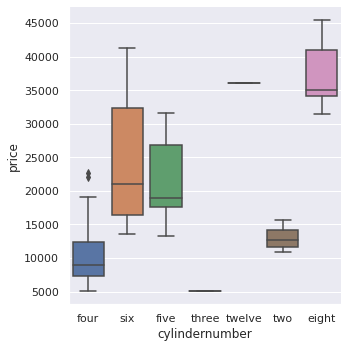

In [111]:
sns.catplot(data=CarPrice_df, x='cylindernumber', y='price', kind='box')

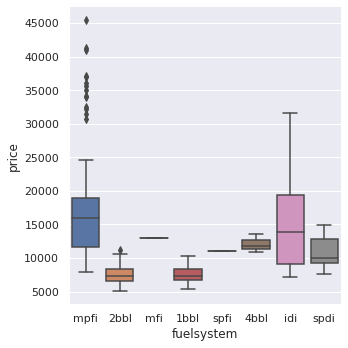

In [112]:
sns.catplot(data=CarPrice_df, x='fuelsystem', y='price', kind='box')

In [113]:
high_corr_category = np.array(['drivewheel', 'enginelocation', 'enginetype'])
CarPrice_df1 = CarPrice_df[np.append(high_corr_val, high_corr_category)]

In [114]:
CarPrice_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wheelbase       205 non-null    float64
 1   carlength       205 non-null    float64
 2   carwidth        205 non-null    float64
 3   curbweight      205 non-null    int64  
 4   enginesize      205 non-null    int64  
 5   boreratio       205 non-null    float64
 6   horsepower      205 non-null    int64  
 7   citympg         205 non-null    int64  
 8   highwaympg      205 non-null    int64  
 9   price           205 non-null    float64
 10  drivewheel      205 non-null    object 
 11  enginelocation  205 non-null    object 
 12  enginetype      205 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 20.9+ KB


In [119]:
X = CarPrice_df1.drop('price', axis=1).values
y = CarPrice_df1['price'].copy().values

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
col_trans = ColumnTransformer([
    ('cat', OrdinalEncoder(), [9,10,11]),
    ('num', StandardScaler(), [0,1,2,3,4,5,6,7,8])
])

In [122]:
X_train_prepared = col_trans.fit_transform(X_train)

In [123]:
lin_reg = LinearRegression()
sgd_reg = SGDRegressor()
rand_forest = RandomForestRegressor()

In [124]:
def display_rmse(model):
  scores = np.sqrt(-cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error'))
  print('Scores on every fold:', scores)
  print('RMSE:', scores.mean())
  print('Standard Deviation:', scores.std())

In [126]:
for model in [lin_reg, sgd_reg, rand_forest]:
  print(model, 'RMSE:')
  display_rmse(model)
  print('################')

LinearRegression() RMSE:
Scores on every fold: [2953.30117288 2894.90774122 3094.1375838  4617.78994673 4386.98438112]
RMSE: 3589.4241651501443
Standard Deviation: 751.7915669772764
################
SGDRegressor() RMSE:
Scores on every fold: [3039.37922858 3160.81920583 3162.74241098 4231.55007856 5347.44070025]
RMSE: 3788.3863248388175
Standard Deviation: 891.4400803369791
################
RandomForestRegressor() RMSE:
Scores on every fold: [2564.29531265 2058.22808723 1570.09503463 2636.37802298 2170.47326727]
RMSE: 2199.893944952167
Standard Deviation: 384.93847979167816
################


In [137]:
rand_forest.fit(X_train_prepared, y_train)

RandomForestRegressor()

In [138]:
X_test_prepared = col_trans.transform(X_test)
X_test_prepared[:5]

array([[ 2.00000000e+00,  0.00000000e+00,  3.00000000e+00,
         1.65472727e+00,  1.11946697e+00,  1.34697370e+00,
         9.17531017e-01,  3.25090675e-01,  1.68598215e+00,
         2.14406778e-01, -9.11882147e-01, -8.02300887e-01],
       [ 1.00000000e+00,  0.00000000e+00,  4.00000000e+00,
        -3.21628751e-01, -2.37426873e-01, -2.89349906e-01,
        -8.33222705e-01, -4.76089076e-01,  1.08854566e+00,
        -5.90462157e-01,  1.06990454e+00,  9.38523971e-01],
       [ 1.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        -9.02909932e-01, -2.01431166e+00, -9.43879347e-01,
        -1.42126212e+00, -1.18015613e+00, -1.56257873e+00,
        -1.14380955e+00,  1.98457532e+00,  1.66386766e+00],
       [ 2.00000000e+00,  0.00000000e+00,  6.00000000e+00,
        -6.37181392e-01, -4.79729344e-01, -1.49093597e-01,
        -3.84556266e-01, -1.39865970e+00,  5.69203966e-03,
        -1.12571227e-01, -1.21677241e+00, -1.09243836e+00],
       [ 1.00000000e+00,  0.00000000e+00,  3.0000000

In [139]:
y_pred = rand_forest.predict(X_test_prepared)

In [140]:
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:
2677.276515003556


In [141]:
pd.DataFrame({'y Test':y_test, 'y Prediction':y_pred, 'Absolute Error':abs(y_test-y_pred)})

,y Test,y Prediction,Absolute Error
0,22625.0,17615.215000,5009.785000
1,7126.0,7756.110000,630.110000
2,5399.0,6060.467500,661.467500
3,10945.0,12438.835000,1493.835000
4,7895.0,8541.780000,646.780000
5,34028.0,31356.495000,2671.505000
6,11595.0,8969.960000,2625.040000
7,7295.0,7197.115000,97.885000
8,6488.0,6561.071667,73.071667
9,10245.0,9096.210000,1148.790000


In [142]:
import joblib

joblib.dump(rand_forest, 'Nomor_5.pkl')

['Nomor_5.pkl']

#Nomor 6

In [143]:
#import package dan module yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [144]:
#menampilkan dataset
tictactoe_df = pd.read_csv('TicTacToe.csv')
tictactoe_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [145]:
#info dataset
tictactoe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [146]:
#statitik deskriptif dataset
tictactoe_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


In [147]:
#banyaknya data tiap nilai di kolom V10
tictactoe_df['V10'].value_counts()

positive    626
negative    332
Name: V10, dtype: int64

In [148]:
#Memilih/slicing dataset yang akan digunakan untuk model dalam bentuk array
X = tictactoe_df.drop('V10', axis=1).values
y = tictactoe_df['V10'].values

In [149]:
#pisah data menjadi data latih dan data uji dengan perbandingan 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [151]:
ordinal_encoder_X = OrdinalEncoder()
X_train_prepared_ordinal = ordinal_encoder_X.fit_transform(X_train)

ordinal_encoder_y = OrdinalEncoder()
y_train_prepared = ordinal_encoder_y.fit_transform(y_train.reshape(-1,1))

In [152]:
one_hot_X = OneHotEncoder()
X_train_prepared_onehot = one_hot_X.fit_transform(X_train).toarray()

In [153]:
#define module function untuk pemodelan
decision_tree = DecisionTreeClassifier()

In [155]:
print('Cross Val Score with Ordinal Encoder:')
cross_val_score(decision_tree, X_train_prepared_ordinal, y_train_prepared, cv=10, scoring='f1').mean()

Cross Val Score with Ordinal Encoder:


0.9017579688792562

In [156]:
print('Cross Val Score with One Hot Encoder:')
cross_val_score(decision_tree, X_train_prepared_onehot, y_train_prepared, cv=10, scoring='f1').mean()

Cross Val Score with One Hot Encoder:


0.9377422164979962

In [157]:
decision_tree.fit(X_train_prepared_onehot, y_train_prepared)

DecisionTreeClassifier()

In [158]:
X_test_prepared = one_hot_X.transform(X_test)
y_test_prepared = ordinal_encoder_y.transform(y_test.reshape(-1,1))

In [159]:
y_pred = decision_tree.predict(X_test_prepared)

In [160]:
f1_score(y_test_prepared, y_pred)

0.9733840304182511

In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test_prepared, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        60
         1.0       0.98      0.97      0.97       132

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192



In [162]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

In [163]:
one_hot_X.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

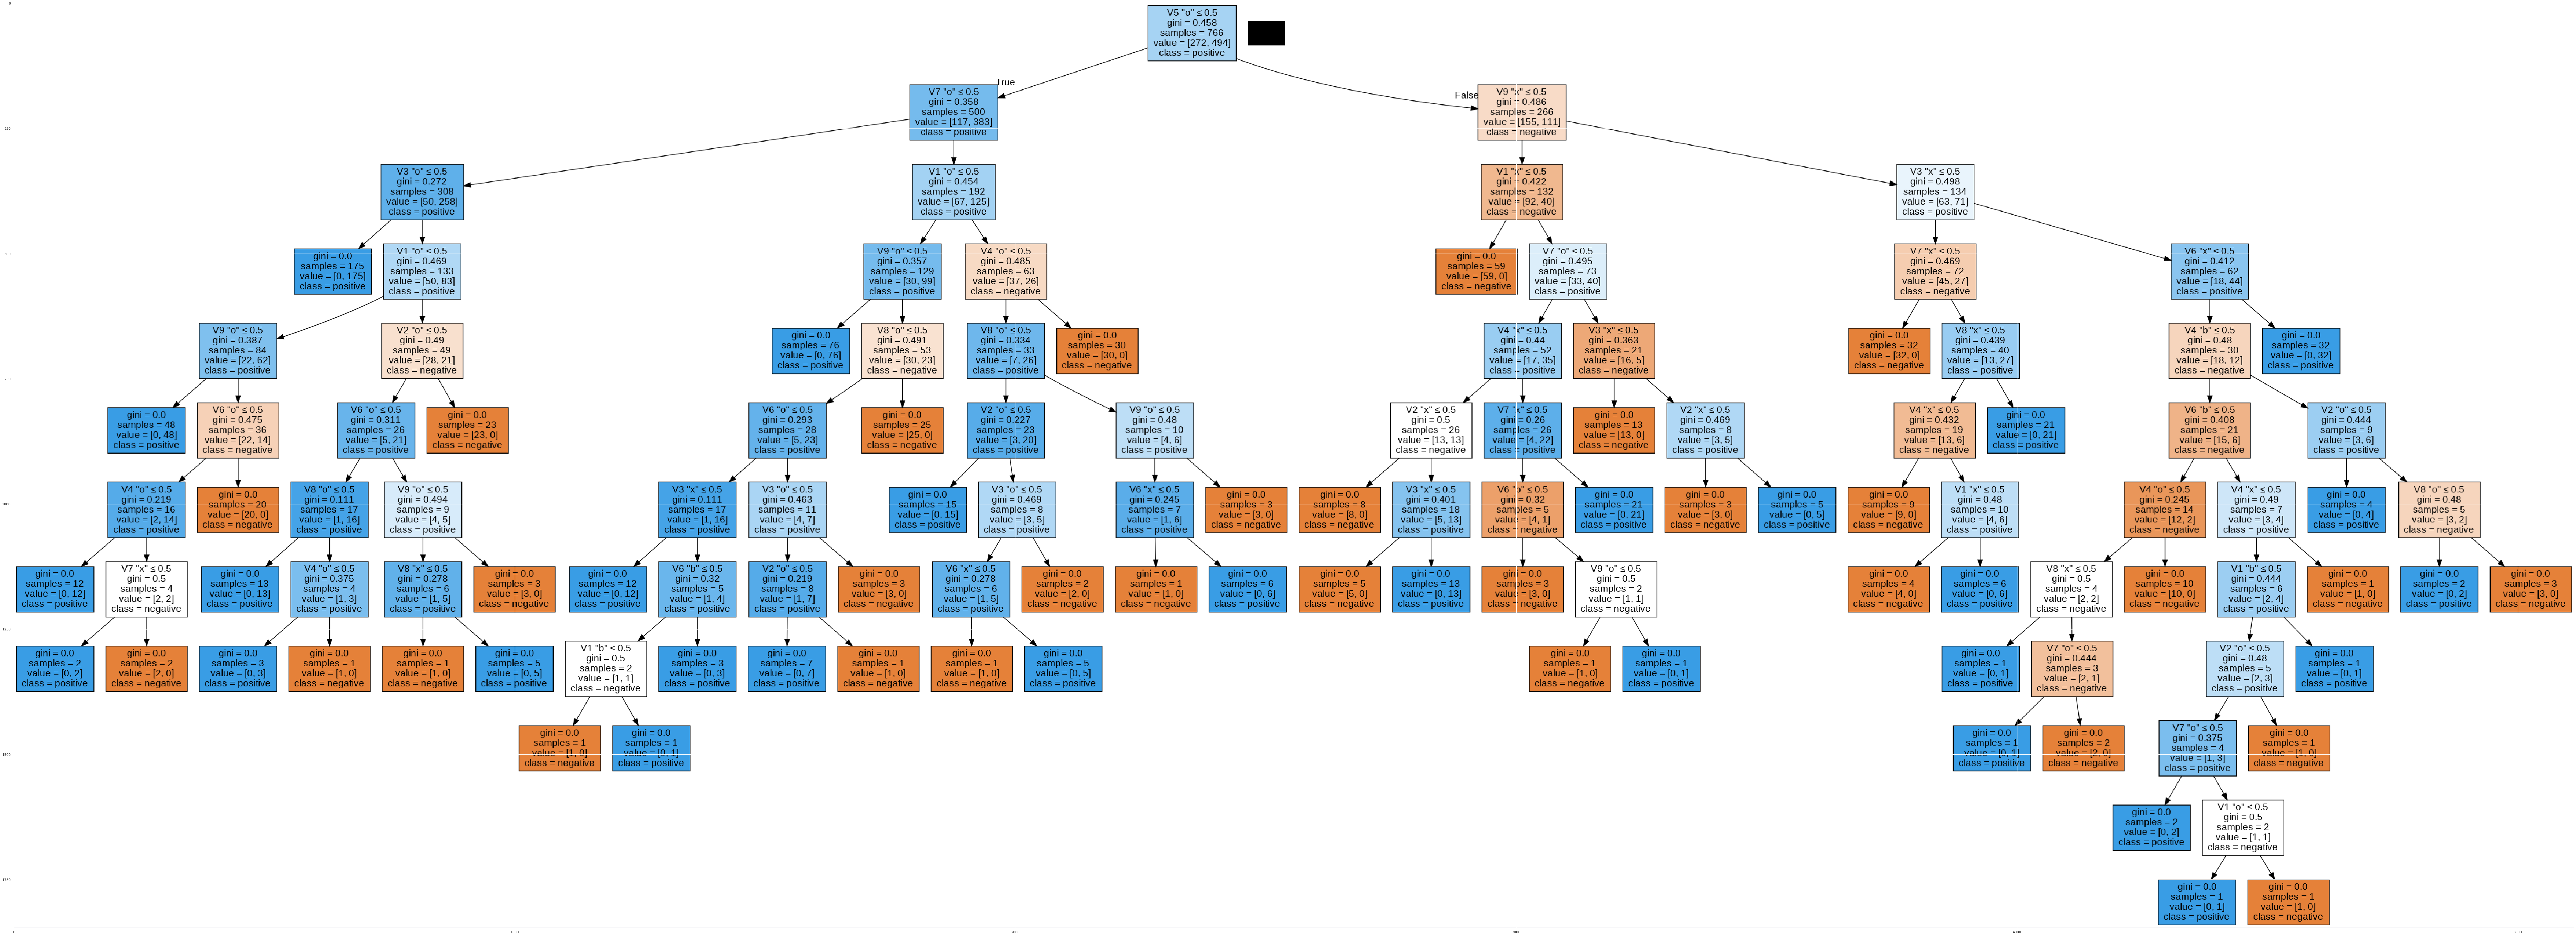

In [165]:
dot_data = StringIO()
filename = 'tictactoe.png'
feature_names = np.array(['V1 "b"','V1 "o"','V1 "x"','V2 "b"','V2 "o"','V2 "x"','V3 "b"','V3 "o"','V3 "x"',
                          'V4 "b"','V4 "o"','V4 "x"','V5 "b"','V5 "o"','V5 "x"','V6 "b"','V6 "o"','V6 "x"',
                          'V7 "b"','V7 "o"','V7 "x"','V8 "b"','V8 "o"','V8 "x"','V9 "b"','V9 "o"','V9 "x"'])
out = tree.export_graphviz(decision_tree, feature_names=feature_names, 
                           out_file=dot_data, class_names=np.unique(y_train),
                           filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(150,250))
plt.imshow(img, interpolation='nearest')

In [167]:
import joblib

joblib.dump(decision_tree, 'Nomor_6.pkl')

['Nomor_6.pkl']

##Penjelasan:
Program ini adalah program yang dibuat untuk membuat model Decision Tree untuk membuat kemungkinan konfigurasi papan tic-tac-toe agar Cauchy menang melawan Riemann. \
Algoritmanya: \
1. import package dan module yang dibutuhkan.
2. Upload dan menampilkan dataset sebagai dataframe yang akan digunakan menggunakan pandas.
3. melihat info dan statistik deskriptif dari dataset.
4. Memilih/slicing dataset yang akan digunakan untuk model dalam bentuk array, disini kolom V10 tidak digunakan sehingga didrop.
5. Melakukan train test split dengan perbandingan 8:2.
6. Mengonversi variabel independen dari kerangka data menjadi nilai numerik dengan OrdinalEncoder(), di fitting kemudian disimpan kedalam variable yang didefinisikan, X dan y baru dalam bentuk array.
7. Melakukan hal yang sama seperti step 6, tetapi sekarang menggunakan metode One Hot Encoder.
8. Define module function untuk pemodelan
9. Melakukan evaluasi kinerja model dengan Ordinal Encoder dan One Hot Encoder, yang lebih baik yang akan digunakan untuk step selanjutnya.
10. Dipilih One Hot Encoder karena lebih baik, kemudian baruX_train_prepared_onehot dan y_train_prepared dimodelkan dengan Decision Tree.
11. Transformasi test set X dan Y yang digunakan.
12. Defini variable prediksi untuk menyimpan hasil prediksi menggunakan Decision Tree.
13. Lihat f1 skor dan klasifikasi reportnya.
14. Visualisasi Decision Tree yang telah dibuat.
